In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway

%matplotlib inline

import os
import warnings
os.chdir("C:\\Users\\ashut\\Desktop\\AnalytixLab Classes\\python teram 2\\Python Foundation Case Study 3 - Insurance Claims Case Study\\Case Study 3 - Insurance Claims Case Study")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.


In [3]:
Claims_data = pd.read_csv('claims.csv')
Cust_data = pd.read_csv('cust_demographics.csv')
cust_claim = pd.merge(left=Claims_data,right=Cust_data, left_on='customer_id',right_on='CUST_ID',how='left').drop('CUST_ID',axis=1)
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes,NaN,NaN,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No,NaN,NaN,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes,NaN,NaN,NaN,NaN,NaN
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No,NaN,NaN,NaN,NaN,NaN


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance

In [5]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [6]:
 # Convert date columns to datetime format
cust_claim['claim_date'] = pd.to_datetime(cust_claim['claim_date'], errors='coerce')
cust_claim['DateOfBirth'] = pd.to_datetime(cust_claim['DateOfBirth'], errors='coerce', format='%d-%b-%y')

# Display the updated DataFrame info
print(cust_claim.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   object        
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [8]:
# Convert claim_amount to numeric, setting errors='coerce' to handle non-numeric values
cust_claim['claim_amount'] = pd.to_numeric(cust_claim['claim_amount'].str.replace('[\$,]', '', regex=True), errors='coerce')

cust_claim["Contact"] = pd.to_numeric(cust_claim.Contact.str.replace("-",""),downcast='float')

In [9]:
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4.131878e+09,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9.568719e+09,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaT,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaT,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaT,NaN,NaN,NaN
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaT,NaN,NaN,NaN


In [10]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float64       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [12]:
# Identify injury claims that are unreported to the police - if the injury clames police_report are unknown and no flag 1 is rais and if yes then 0 and for other wise case o is raised 
cust_claim['alert_flag'] = cust_claim.apply(
    lambda row: 1 if 'injury' in row['claim_type'].lower() and row['police_report'].lower() in ['no', 'unknown'] else 0, axis=1
)
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4.131878e+09,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9.568719e+09,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaT,NaN,NaN,NaN,0
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaT,NaN,NaN,NaN,0
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaT,NaN,NaN,NaN,1
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaT,NaN,NaN,NaN,1


 ## if the claim_type is injury and  police_report are unknown and no flag 1 is raised and if yes then 0 and for other cases o is raised.

### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [15]:
# Drop duplicates based on customer_id, keeping the most recent claim
cust_claim = cust_claim.drop_duplicates(subset='customer_id', keep='first')

In [16]:
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4.131878e+09,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9.568719e+09,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaT,NaN,NaN,NaN,0
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaT,NaN,NaN,NaN,0
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaT,NaN,NaN,NaN,1
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaT,NaN,NaN,NaN,1


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [18]:
cust_claim.isnull().sum()
# 

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
alert_flag              0
dtype: int64

In [19]:
# #removing missing values from the age as it is in datetime64 [ns] formate it will be difficult to deal with it with rest so doing it seperatly.
# # Calculate the median age
current_date = pd.Timestamp.now()
cust_claim['Age'] = cust_claim['DateOfBirth'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)) if pd.notnull(x) else None)
median_age = cust_claim['Age'].median()

# # Calculate the median date of birth based on the median age
median_dob = current_date - pd.to_timedelta(median_age*365, unit='D')

# # Fill missing 'DateOfBirth' with the calculated median date of birth
cust_claim['DateOfBirth'].fillna(median_dob, inplace=True)


In [20]:
#creating seprate catagoriacal variable. 
catagorical_var = cust_claim.select_dtypes('object')
catagorical_var.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   incident_cause  1093 non-null   object
 1   claim_area      1093 non-null   object
 2   police_report   1093 non-null   object
 3   claim_type      1093 non-null   object
 4   fraudulent      1093 non-null   object
 5   gender          1078 non-null   object
 6   State           1078 non-null   object
 7   Segment         1078 non-null   object
dtypes: object(8)
memory usage: 76.9+ KB


In [21]:
#creating separate continious variable.
continious_var = cust_claim.select_dtypes('number')
continious_var.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1093 non-null   int64  
 1   customer_id          1093 non-null   int64  
 2   claim_amount         1028 non-null   float64
 3   total_policy_claims  1083 non-null   float64
 4   Contact              1078 non-null   float64
 5   alert_flag           1093 non-null   int64  
 6   Age                  1078 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 68.3 KB


In [22]:
#replacing missing values of catogarical data with mode:
for  var in catagorical_var:
    cust_claim[var] = cust_claim[var].fillna(cust_claim[var].mode()[0])
    
#replacing missing values of continious variable data with mean:
# for col in continious_col:
    # cust_claim[continious_col] = cust_claim[continious_col].fillna(cust_claim[continious_col].mean())
for var in continious_var:
    mean_value = cust_claim[var].mean()
    cust_claim[var].fillna(mean_value, inplace=True)
    
#checking for the  missing values 
cust_claim.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
alert_flag             0
Age                    0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the
### customers according to the below criteria
#### Children < 18
#### Youth 18-30
#### Adult 30-60
#### Senior > 60


In [24]:
cust_claim['Age_group'] = pd.cut(cust_claim.Age , bins = [0,18,30,60,100] ,labels =['Children','Youth','Adult','Senior']) 
cust_claim.groupby('Age_group').count()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,Age
Age_group,,,,,,,,,,,,,,,,,
Children,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Youth,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
Adult,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636
Senior,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 8. What is the average amount claimed by the customers from various segments?

In [26]:
# Group by 'Segment' and calculate the mean 'claim_amount'
average_amount_claim_segment = cust_claim.groupby('Segment')['claim_amount'].mean().reset_index()

print(f"Average Amount Claimed by Customers from Various Segments: \n{average_amount_claim_segment}")

Average Amount Claimed by Customers from Various Segments: 
    Segment  claim_amount
0      Gold  12675.262946
1  Platinum  12368.233815
2    Silver  12267.349306


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [28]:
# Define the cut-off date (20 days prior to 1st October 2018)
cut_off_date = pd.Timestamp('2018-10-01') - pd.Timedelta(days=20)

# # Filter the DataFrame for claims at least 20 days before 1st October 2018
filtered_claims = cust_claim[cust_claim['claim_date'] < cut_off_date]

# # Group by 'incident_cause' and calculate the total 'claim_amount'
claim_by_incident = filtered_claims.groupby('incident_cause')['claim_amount'].sum().reset_index()

# # Display the result
claim_by_incident.set_index('incident_cause').round(2)


,claim_amount
incident_cause,
Crime,729485.64
Driver error,3292986.73
Natural causes,1315024.04
Other causes,3779918.82
Other driver error,3384078.95


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

##### I have done this question in 2 aproches in first one i have done the filltering worke directly on my main data frame and in second one i have made a anaother data farme , retrive the data frome main to substitute data frame and done the filltering work.

In [31]:
cust_claim.loc[(cust_claim.incident_cause.str.lower().str.contains("driver") & ((cust_claim.State == "TX") | (cust_claim.State == "DE") | (cust_claim.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

In [32]:
#filter the dataframe for adults from the specified states
filter_adults = cust_claim[(cust_claim['State'].isin(['TX','DE','AK'])) &
                (cust_claim['incident_cause'].isin(['Driver error','other driver error']))]
# Group by state and count unique customers
adults_claiming_driver= filter_adults.groupby('State')['customer_id'].nunique().reset_index()

# Rename columns for clarity
adults_claiming_driver.columns = ['State', 'Number of Adults']

# Display the result
adults_claiming_driver


,State,Number of Adults
0,AK,6
1,DE,10
2,TX,6


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart

In [34]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 0 to 1099
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1093 non-null   int64         
 1   customer_id          1093 non-null   int64         
 2   incident_cause       1093 non-null   object        
 3   claim_date           1093 non-null   datetime64[ns]
 4   claim_area           1093 non-null   object        
 5   police_report        1093 non-null   object        
 6   claim_type           1093 non-null   object        
 7   claim_amount         1093 non-null   float64       
 8   total_policy_claims  1093 non-null   float64       
 9   fraudulent           1093 non-null   object        
 10  gender               1093 non-null   object        
 11  DateOfBirth          1093 non-null   datetime64[ns]
 12  State                1093 non-null   object        
 13  Contact              1093 non-null   f

In [35]:
gender_segment = cust_claim[['claim_amount','gender','Segment']].groupby(by=['gender','Segment']).sum().round(2).reset_index()
gender_segment_pivoit = gender_segment.pivot(index = "Segment", columns = "gender", values = "claim_amount")
gender_segment_pivoit

gender,Female,Male
Segment,,
Gold,2109531.54,2783119.95
Platinum,2369323.09,2095609.32
Silver,1898223.45,2346279.41


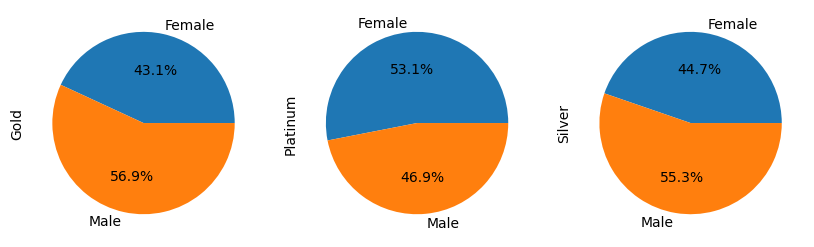

In [36]:
gender_segment_pivoit.T.plot(kind = 'pie',autopct='%1.1f%%',subplots=True,legend = False,figsize=(10,5))
plt.show()


### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [38]:
# Filter the DataFrame for driver-related issues
driver_issues = cust_claim[cust_claim['incident_cause'].str.contains('driver', case=False, na=False)]

# Group by gender and sum the claim amounts for driver-related issues
gender_driver_claims = driver_issues.groupby('gender')['claim_amount'].count().reset_index()
gender_driver_claims.round(2)


,gender,claim_amount
0,Female,221
1,Male,285


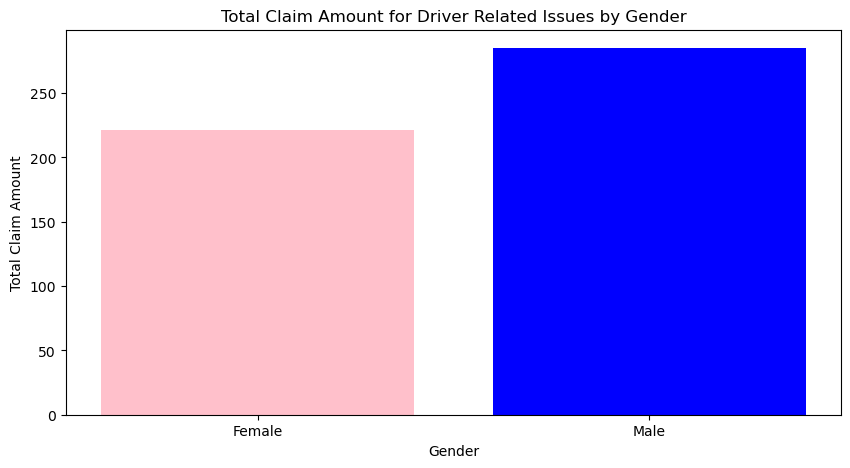

In [39]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.bar(gender_driver_claims['gender'], gender_driver_claims['claim_amount'], color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Total Claim Amount')
plt.title('Total Claim Amount for Driver Related Issues by Gender')
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [41]:
most_Fraud_claim=cust_claim[['Age_group','fraudulent']].groupby('Age_group').count().reset_index()
most_Fraud_claim

,Age_group,fraudulent
0,Children,0
1,Youth,212
2,Adult,636
3,Senior,0


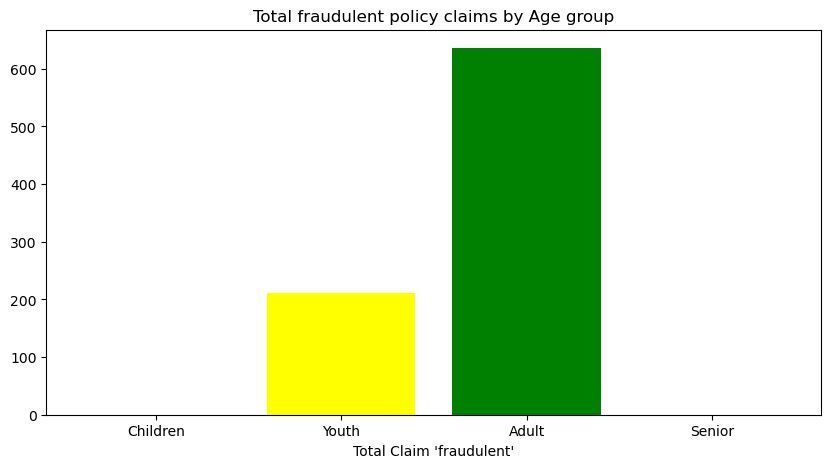

In [42]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.bar( most_Fraud_claim['Age_group'],most_Fraud_claim['fraudulent'],color=['green','yellow'])
plt.xlabel('Age_group')
plt.xlabel("Total Claim 'fraudulent'")
plt.title('Total fraudulent policy claims by Age group')
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order

In [44]:
cust_claim['Month'] = cust_claim['claim_date'].dt.month
monthly_claim = cust_claim.groupby('Month')['claim_amount'].sum().reset_index()

# Replace month numbers with month names
monthly_claim['Month_Name'] = monthly_claim['Month'].apply(lambda x: pd.Timestamp(2023, x, 1).strftime('%B'))

# Sort by month number to ensure chronological order
monthly_claim = monthly_claim.sort_values('Month').round(2).set_index('Month')
monthly_claim


,claim_amount,Month_Name
Month,,
1,1331831.59,January
2,1156578.91,February
3,1348315.14,March
4,1276019.95,April
5,1115035.32,May
6,1317727.86,June
7,1382493.04,July
8,913414.68,August
9,980390.27,September


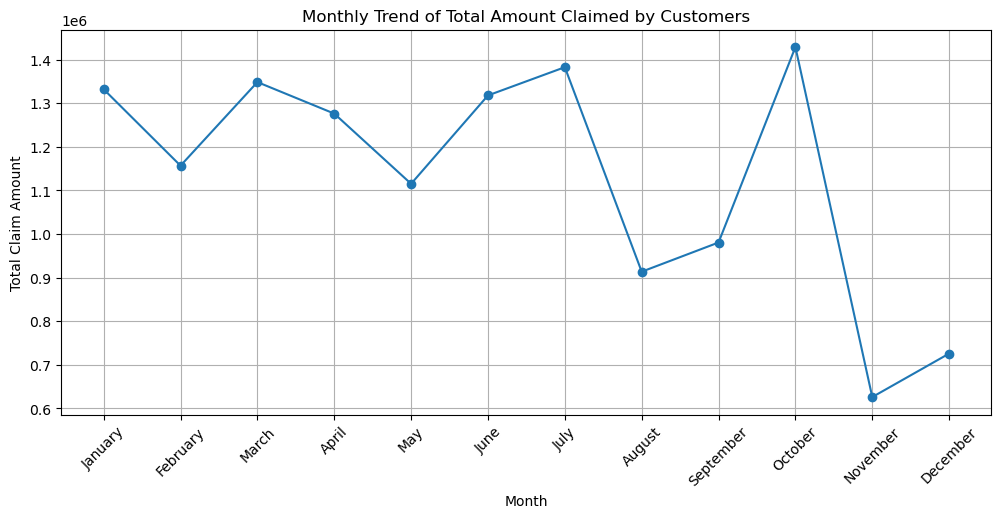

In [45]:
# Plotting
plt.figure(figsize=(12, 5))
plt.plot(monthly_claim['Month_Name'],monthly_claim['claim_amount'].round(2), marker='o')
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')
plt.title('Monthly Trend of Total Amount Claimed by Customers')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

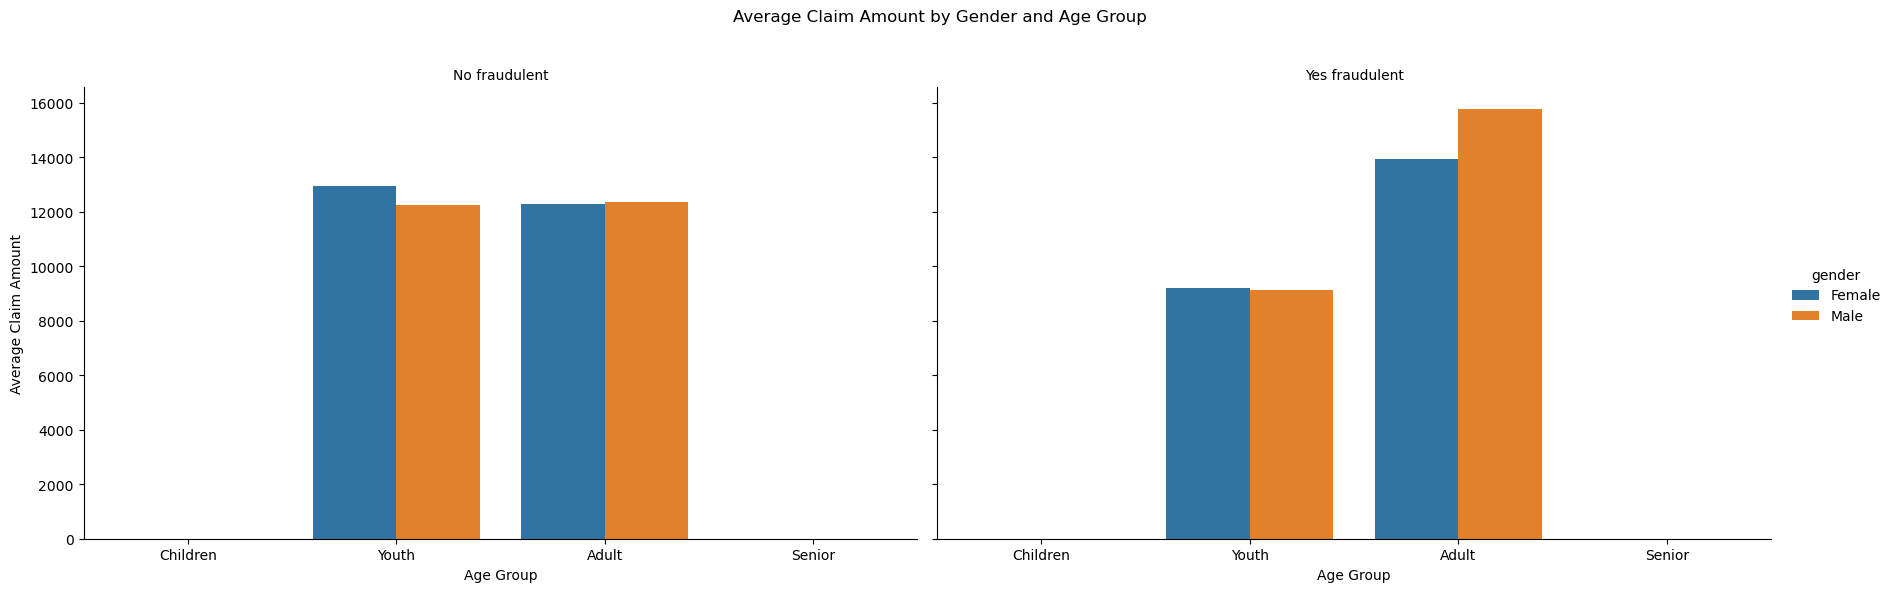

In [47]:
avg_claim_amount = cust_claim.groupby(['gender', 'Age_group', 'fraudulent'])['claim_amount'].mean().reset_index()

# Plot the facetted bar chart using seaborn
g = sns.catplot(
    data=avg_claim_amount,
    x='Age_group', 
    y='claim_amount', 
    hue='gender', 
    col='fraudulent', 
    kind='bar', 
    height=6, 
    aspect=1.5
)
g.set_axis_labels("Age Group", "Average Claim Amount")
g.set_titles("{col_name} fraudulent")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Average Claim Amount by Gender and Age Group')
plt.show()
warnings.simplefilter(action='ignore', category=FutureWarning)

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

### 16. Is there any similarity in the amount claimed by males and females?


In [50]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 0 to 1099
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1093 non-null   int64         
 1   customer_id          1093 non-null   int64         
 2   incident_cause       1093 non-null   object        
 3   claim_date           1093 non-null   datetime64[ns]
 4   claim_area           1093 non-null   object        
 5   police_report        1093 non-null   object        
 6   claim_type           1093 non-null   object        
 7   claim_amount         1093 non-null   float64       
 8   total_policy_claims  1093 non-null   float64       
 9   fraudulent           1093 non-null   object        
 10  gender               1093 non-null   object        
 11  DateOfBirth          1093 non-null   datetime64[ns]
 12  State                1093 non-null   object        
 13  Contact              1093 non-null   f

Null Hypothesis (H0): There is no significant difference in the average claim amounts between males and females.

Alternative Hypothesis (Ha): There is a significant difference in the average claim amounts between males and females.

In [52]:
# Perform the two-sample t-test
male_claims = cust_claim[cust_claim['gender'] == 'Male']['claim_amount']
female_claims = cust_claim[cust_claim['gender'] == 'Female']['claim_amount']

# Remove missing values
male_claims = male_claims.dropna()
female_claims = female_claims.dropna()

The test will be conducted at a 5% significance level (α = 0.05).

We will use a 95% confidence interval.

A two-sample t-test will be used to compare the means of claim amounts between males and females.

In [54]:
# Calculate summary statistics
male_mean = male_claims.mean()
female_mean = female_claims.mean()
#Calculates the variance of the claim amounts
male_var = male_claims.var(ddof=1)   
female_var = female_claims.var(ddof=1)

male_n = len(male_claims)
female_n = len(female_claims)

# Print summary statistics
print(f"\nMale mean: {male_mean},\nvariance: {male_var}, \nsample size: {male_n}")
print(f"\nFemale mean: {female_mean}, \nvariance: {female_var}, \nsample size: {female_n}\n")


Male mean: 12765.032998308838,
variance: 183623843.34779936, 
sample size: 566

Female mean: 12100.717432755706, 
variance: 172811371.12923953, 
sample size: 527



If p-value < 0.05, we reject the null hypothesis (H0), indicating a significant difference in the claim amounts between males and females.

If p-value ≥ 0.05, we fail to reject the null hypothesis (H0), indicating no significant difference in the claim amounts between males and females.

In [56]:
# Calculate the t-statistic manually
pooled_std = np.sqrt(male_var/male_n + female_var/female_n)
t_stat_manual = (male_mean - female_mean) / pooled_std

# Calculate the degrees of freedom
df = male_n + female_n - 2

# Perform the t-test using scipy
t_stat, p_val = stats.ttest_ind(male_claims, female_claims)

# Print t-statistic and p-value
print(f"Manual t-statistic: {t_stat_manual}")
print(f"\nScipy t-statistic: {t_stat}, \nP-value: {p_val}")

Manual t-statistic: 0.8225034618130944

Scipy t-statistic: 0.821612848932144, 
P-value: 0.4114767802889234


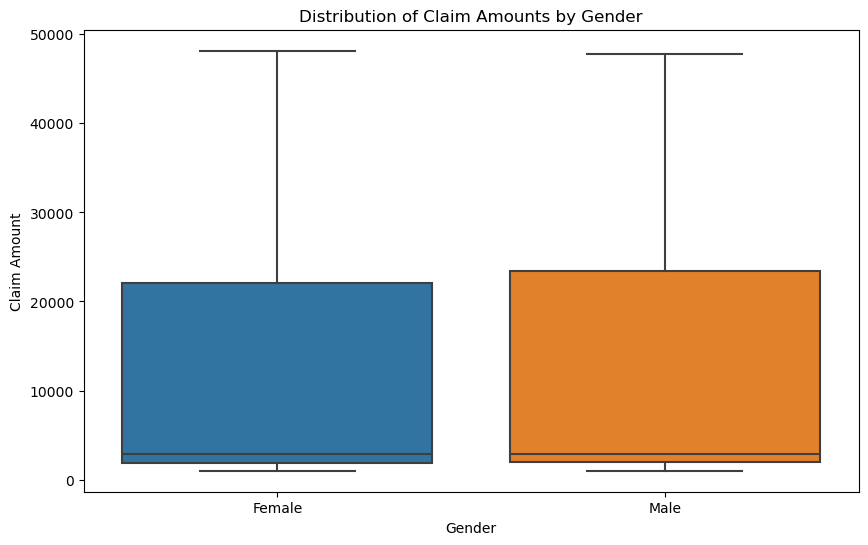

Fail to reject the null hypothesis (H0). There is no significant difference in claim amounts between males and females.


In [57]:
# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='claim_amount', data=cust_claim)
plt.title('Distribution of Claim Amounts by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim Amount')
plt.show()

# Decision based on p-value
if p_val < 0.05:
    print("Reject the null hypothesis (H0). There is a significant difference in claim amounts between males and females.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference in claim amounts between males and females.")

#### The similarity in claim amounts suggests that gender does not significantly influence the amount claimed.

### 17 Is there any relationship between age category and segment?


H0 : There is no relationship between age category and segment.

Ha : There is a significant relationship between age category and segment.

In [61]:
# Calculate the contingency table
contingency_table = pd.crosstab(cust_claim['Age_group'], cust_claim['Segment'])
contingency_table

Segment,Gold,Platinum,Silver
Age_group,,,
Youth,81,66,65
Adult,224,212,200


We have use Chi-Square test of independence as it is  used to determine if there is a significant relationship between two categorical variables.

In [63]:
# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print('\n')
print("Expected Frequencies Table:")
print(expected)


Chi-Square Statistic: 0.6609940504138601
p-value: 0.7185664989991633
Degrees of Freedom: 2


Expected Frequencies Table:
[[ 76.25  69.5   66.25]
 [228.75 208.5  198.75]]


CI - 95%  
p - 0.05

In [65]:
if p < 0.05:
    print("We reject the null hypothesis. There is a significant relationship between age category and segment.")
else:
    print("We fail to reject the null hypothesis. There is no significant relationship between age category and segment.")

We fail to reject the null hypothesis. There is no significant relationship between age category and segment.


### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.


H0: The mean claim amount for the current year is equal to 10,000.  
Ha: The mean claim amount for the current year is greater than 10,000.


In [68]:
# Extract the year from 'claim_date' to filter the current year data
cust_claim['Year'] = cust_claim['claim_date'].dt.year
current_year = cust_claim['Year'].max()
claim_data = cust_claim[[ 'Year', 'claim_amount']].groupby('Year').sum().round(2)
# Filter the data for the current year
current_year_claims = cust_claim[cust_claim['Year'] == current_year]['claim_amount'].reset_index().drop('index',axis=1)

In [69]:
current_year_claims.head(10)

,claim_amount
0,2980.0
1,3369.5
2,1680.0
3,2680.0
4,1730.0
5,1160.0
6,2620.0
7,1495.0
8,1870.0
9,1050.0


In [70]:
# Filter data for the current year (assuming the current year is 2018 for this example)
current_year_claims = cust_claim[cust_claim['Year'] == 2018]['claim_amount']

In [71]:
# Define the population mean (from 2016-17 fiscal average)
fiscal_average = 10000

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(current_year_claims, fiscal_average)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 4.308914037117706
P-Value: 1.985741363740185e-05


 We will test the hypothesis at a 5% significance level (α = 0.05). Use the one-sample t-test to compare the mean claim amount of the current year to $10,000.

In [73]:
# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the claim amounts.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the claim amounts.")

Reject the null hypothesis. There is a significant difference in the claim amounts.


In [74]:
claim_data

,claim_amount
Year,
2017,7441802.54
2018,6160284.22


### 19. Is there any difference between age groups and insurance claims?


#### Null Hypothesis (H0): There is no significant difference in the claim amounts among different age groups.
#### Alternative Hypothesis (Ha): There is a significant difference in the claim amounts among different age groups.

we will use a one-way ANOVA (Analysis of Variance) test. This test helps us to compare the means of multiple groups to see if at least one group mean is different from the others.

In [77]:
# Filter out any rows with missing 'Age_group' or 'claim_amount'
cust_claim = cust_claim.dropna(subset=['Age_group', 'claim_amount'])

# Extract claim amounts for each age group
age_groups = cust_claim['Age_group'].unique()
grouped_claims = [cust_claim[cust_claim['Age_group'] == age]['claim_amount'] for age in age_groups]

f_stat, p_value = stats.f_oneway(*grouped_claims)

# Print the results
print("F-Statistic:", f_stat)
print("P-Value:", p_value)


F-Statistic: 1.0234689284940681
P-Value: 0.3119868286804521


In [78]:
# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean claim amounts between age groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean claim amounts between age groups.")

Fail to reject the null hypothesis. There is no significant difference in the mean claim amounts between age groups.


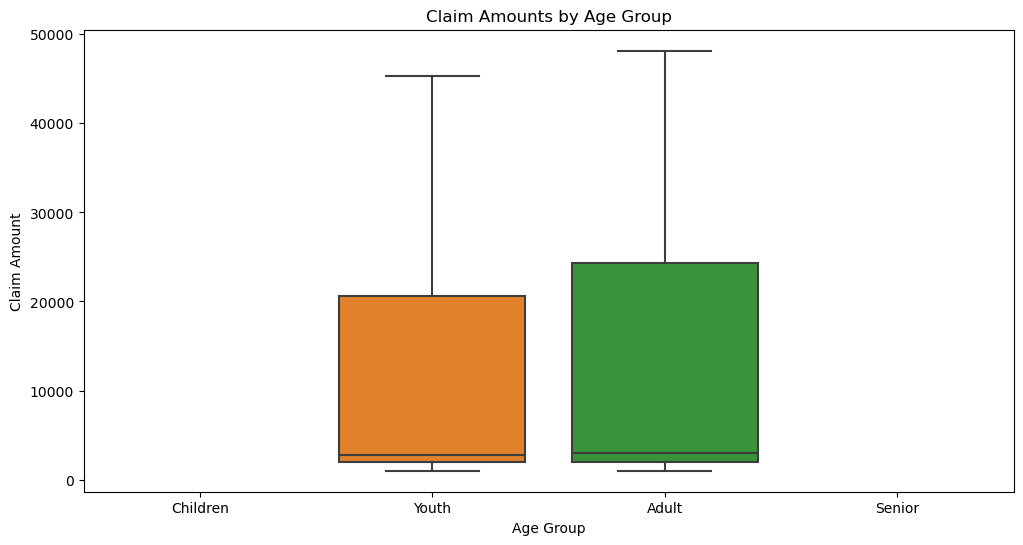

In [79]:
# Boxplot of claim amounts by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_group', y='claim_amount', data=cust_claim)
plt.title('Claim Amounts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Claim Amount')
plt.show()

### 20. Is there any relationship between total number of policy claims and the claimed amount?

#### H0: There is no relationship between the total number of policy claims and the claimed amount.
    
#### Ha: There is a relationship between the total number of policy claims and the claimed amount.

we will use correlation analysis and linear regression. To determine if there is any relationship between the total number of policy claims and the claimed amount

In [82]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, 0 to 1099
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             848 non-null    int64         
 1   customer_id          848 non-null    int64         
 2   incident_cause       848 non-null    object        
 3   claim_date           848 non-null    datetime64[ns]
 4   claim_area           848 non-null    object        
 5   police_report        848 non-null    object        
 6   claim_type           848 non-null    object        
 7   claim_amount         848 non-null    float64       
 8   total_policy_claims  848 non-null    float64       
 9   fraudulent           848 non-null    object        
 10  gender               848 non-null    object        
 11  DateOfBirth          848 non-null    datetime64[ns]
 12  State                848 non-null    object        
 13  Contact              848 non-null    fl

In [83]:
grouped_data = cust_claim.groupby('total_policy_claims')['claim_amount'].apply(list)


In [84]:
# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)


F-Statistic: 0.9447765503520309
P-Value: 0.4784865425536432


In [85]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between the total number of policy claims and the claimed amount.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between the total number of policy claims and the claimed amount.")

Fail to reject the null hypothesis. There is no significant relationship between the total number of policy claims and the claimed amount.
